# Agrupamento de clientes - Kmeans

In [160]:
# Importa bibliotecas
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# Carrega o Dataset
df_clientes = pd.read_csv('../../datasets/clientes_kmeans.csv')

In [162]:
# Pré-processamento
# One-Hot Enconding
df_clientes = pd.get_dummies(df_clientes, columns=['categoria_produto_preferida'], prefix='categiria')

In [163]:
# Seleciona as features
features_clustering = ['valor_total_compras', 'frequencia_compras', 'recencia_ultima_compra']
X = df_clientes[features_clustering]

In [164]:
# Escalonamento das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [165]:
# Escolha do número de clusters
wcss = []
range_k = range(1,11)

for k in range_k:
  kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans_temp.fit(X_scaled)
  wcss.append(kmeans_temp.inertia_)


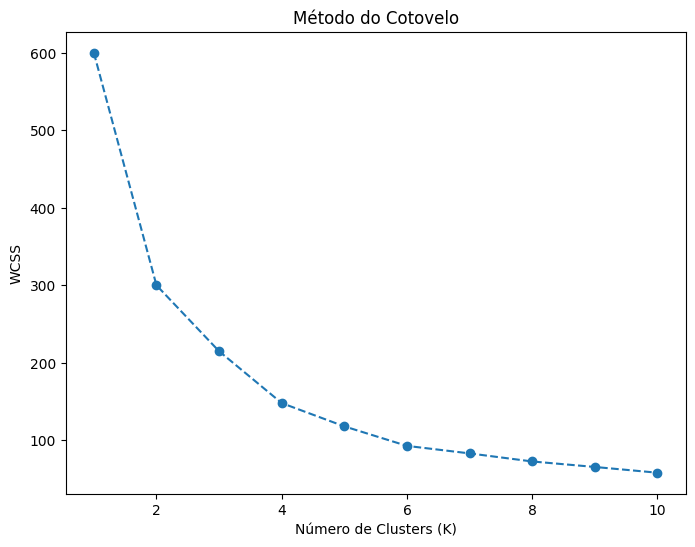

In [166]:
# Visualiza Método do Cotovelo
plt.figure(figsize=(8,6))
plt.plot(range_k, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
# plt.xticks(True)
plt.show()

In [167]:
# Escolha um K adequado
k_escolhido = 3
kmeans_final = KMeans(n_clusters=k_escolhido, random_state=42, n_init=10)
df_clientes['cluster'] = kmeans_final.fit_predict(X_scaled)

In [168]:
# Avalia - Coeficientes de Silhuete
score_silhueta = silhouette_score(X_scaled, df_clientes['cluster'])
print(f"Coeficiente de Silhueta (K={k_escolhido}): {score_silhueta:.4f}")

Coeficiente de Silhueta (K=3): 0.3880


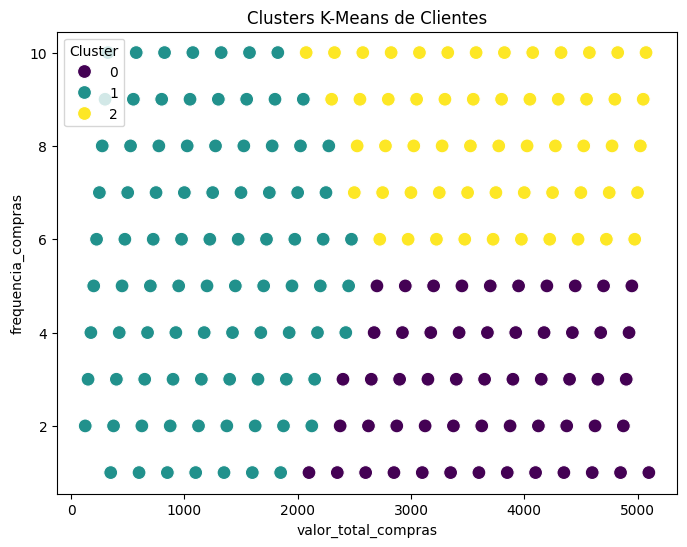

In [169]:
# Visualização 2D
plt.figure(figsize=(8,6))
sns.scatterplot(
  x='valor_total_compras', 
  y='frequencia_compras', 
  hue='cluster',
  data=df_clientes,
  palette='viridis',
  s=100)
plt.title('Clusters K-Means de Clientes')
plt.legend(title='Cluster')
plt.show()

In [170]:
# Perfil dos segmentos
perfil_clusters = df_clientes.groupby('cluster')[features_clustering].mean()
print(f'Perfil dos Clusters (médias): ')
print(perfil_clusters)

Perfil dos Clusters (médias): 
         valor_total_compras  frequencia_compras  recencia_ultima_compra
cluster                                                                 
0                3692.272727            2.872727              157.309091
1                1222.443182            5.443182              256.102273
2                3716.666667            8.122807              156.333333


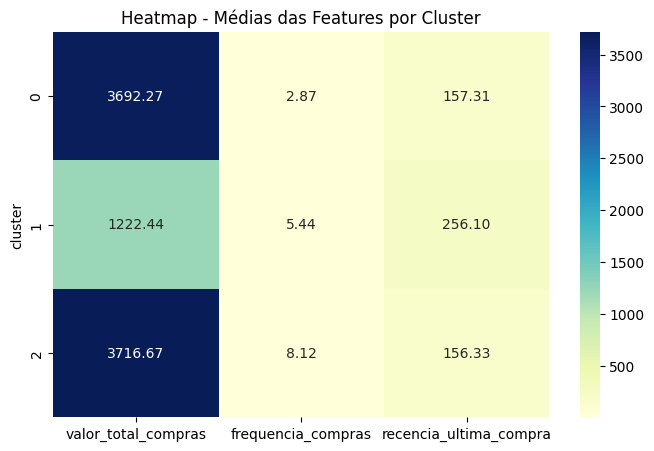

In [171]:
# Visualizar em Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(perfil_clusters, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Heatmap - Médias das Features por Cluster')
plt.show()